In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

In [81]:
textfile=open('/content/drive/MyDrive/DataScience-Datasets/Agatha Christie - Death On The Nile.txt','r').read()

In [82]:
textfile[:200]

'Agatha Christie - Death On The Nile\nPART ONE\nCHAPTER 1\nLinnet Ridgeway!\n"That\'s Her." said Mr. Burnaby, the landlord of the Three Crowns.\nHe nudged his companion.\nThe two men stared with round bucolic'

In [83]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [84]:
words=word_tokenize(textfile)

In [85]:
print('Length of words: ',len(words))

Length of words:  101021


In [86]:
fdist=FreqDist(words)

In [87]:
fdist.most_common(10)

[('.', 6948),
 (',', 3908),
 ("''", 3250),
 ('``', 3026),
 ('the', 2740),
 ('I', 1994),
 ('to', 1730),
 ('a', 1702),
 ('of', 1438),
 ('and', 1378)]

In [88]:
words_no_punc=[]
for word in words:
  if(word.isalpha()):
    words_no_punc.append(word.lower())

In [89]:
fdist1=FreqDist(words_no_punc)
fdist1.most_common(10)

[('the', 3108),
 ('i', 1997),
 ('a', 1813),
 ('to', 1748),
 ('and', 1654),
 ('you', 1550),
 ('of', 1476),
 ('it', 1443),
 ('that', 1308),
 ('was', 1187)]

In [90]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [91]:
stopwords_list=stopwords.words("english")

In [92]:
stopwords_list[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [93]:
clean_words=[]
for word in words_no_punc:
  if word not in stopwords_list:
    clean_words.append(word)

In [94]:
clean_words[:10]

['agatha',
 'christie',
 'death',
 'nile',
 'part',
 'one',
 'chapter',
 'linnet',
 'ridgeway',
 'said']

In [95]:
clean_words_string=" ".join(clean_words)

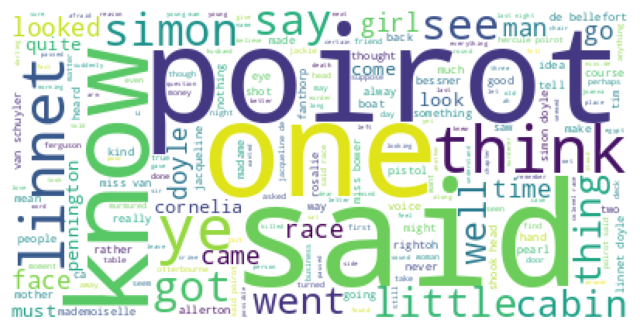

In [96]:
wordcloud=WordCloud(background_color='white').generate(clean_words_string)
plt.figure(figsize=(8,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [97]:
#MASKING

from PIL import Image

In [98]:
mask_img=np.array(Image.open('/content/drive/MyDrive/DataScience-Datasets/horse.jpg'))

In [99]:
mask_img

array([[255, 255, 255, ..., 221, 222, 220],
       [255, 255, 255, ..., 221, 222, 220],
       [255, 255, 255, ..., 221, 222, 220],
       ...,
       [221, 221, 221, ..., 255, 255, 255],
       [221, 221, 221, ..., 255, 255, 255],
       [221, 221, 221, ..., 255, 255, 255]], dtype=uint8)

In [100]:
def transform_format(val):
  if np.any(val==0) or np.any(val)==255:
    return 255
  else:
    return val

In [101]:
transformed_mask=np.ndarray((mask_img.shape[0],mask_img.shape[1]),np.int32)

In [102]:
for i in range(len(mask_img)):
  transformed_mask[i]=list(map(transform_format,mask_img[i]))

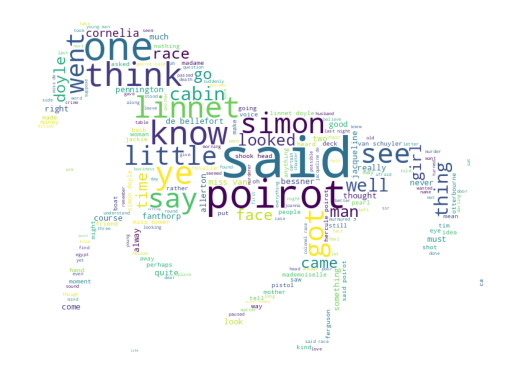

In [103]:
wordcloud=WordCloud(background_color='white',mask=mask_img).generate(clean_words_string)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()